# Data Exploration

In this notebook, we display differents metrics and values in order to gain insight on our data.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('../data/processed/sequences.csv')
sequences = df['Sequence']
label = df['Family']

Let's see the number of sequences and families of genes

In [57]:
print('Number of sequences: {}'.format(len(sequences)))
print('Number of families: {}'.format(len(set(label))))

Number of sequences: 1155
Number of families: 50


In [58]:
print(df.head())

   Family  Gene  Species                                           Sequence
0       6    30        9  GKLPTQRFSKNYHAFWTSKVKEDGYPLWSSSVRGIRDSGWVEWIVI...
1       6    31        9  GKLPTQRFSKNYHAFWTSKVKEDGYPLWSSSVSGIRDSGWVEWIVI...
2       6    12        9  AQLPIQLMFAKNYQAFGTSKRKEDGYPVWSSAGGIRESVVVEWSKV...
3       6    22       16  GMLPTEMFMKNDHGFATSKGMEDGYPCWSSTGGIRDSRWVDWNDVR...
4       6    23       17  GLLPTQMFIKNYHGFATSKGKEDGYPLWSSAAGIRDSVWADWNEVR...


In [59]:
# Display the distribution of the number of sequences per family
print('Distribution of the number of sequences per family:')
print(df.groupby('Family').count()['Sequence'].describe())



Distribution of the number of sequences per family:
count    50.000000
mean     23.100000
std      11.436158
min       8.000000
25%      14.000000
50%      20.000000
75%      28.750000
max      65.000000
Name: Sequence, dtype: float64


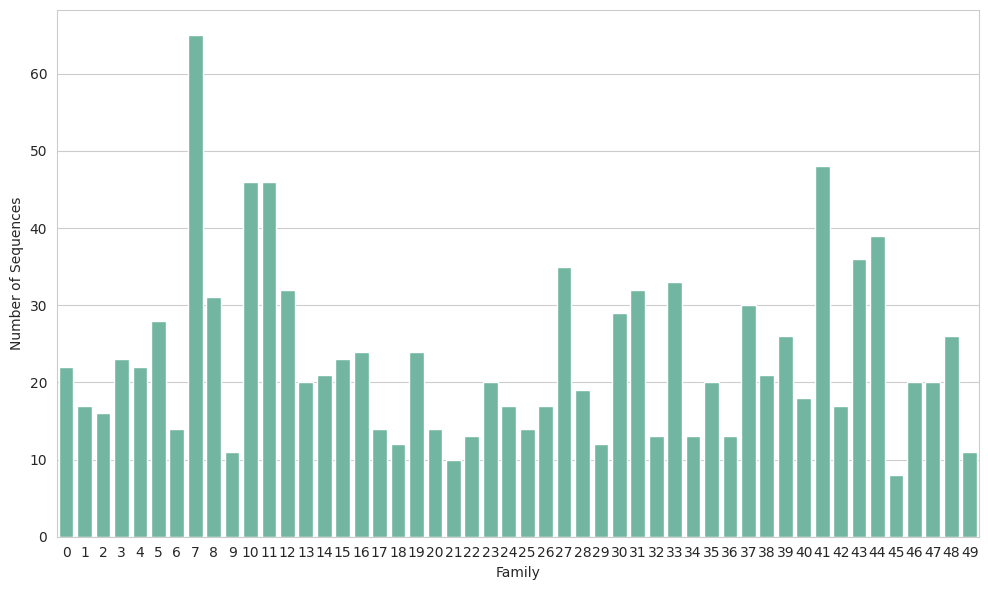

In [60]:
# Display the distribution of the families
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', data=df)
plt.xlabel('Family')
plt.ylabel('Number of Sequences')
plt.tight_layout()
plt.show()

In [61]:
# Display the distribution of the length of the sequences
print('Distribution of the length of the sequences:')
print(df['Sequence'].apply(len).describe())


Distribution of the length of the sequences:
count    1155.000000
mean      577.707359
std       531.720248
min        36.000000
25%       487.000000
50%       502.000000
75%       526.000000
max      8363.000000
Name: Sequence, dtype: float64


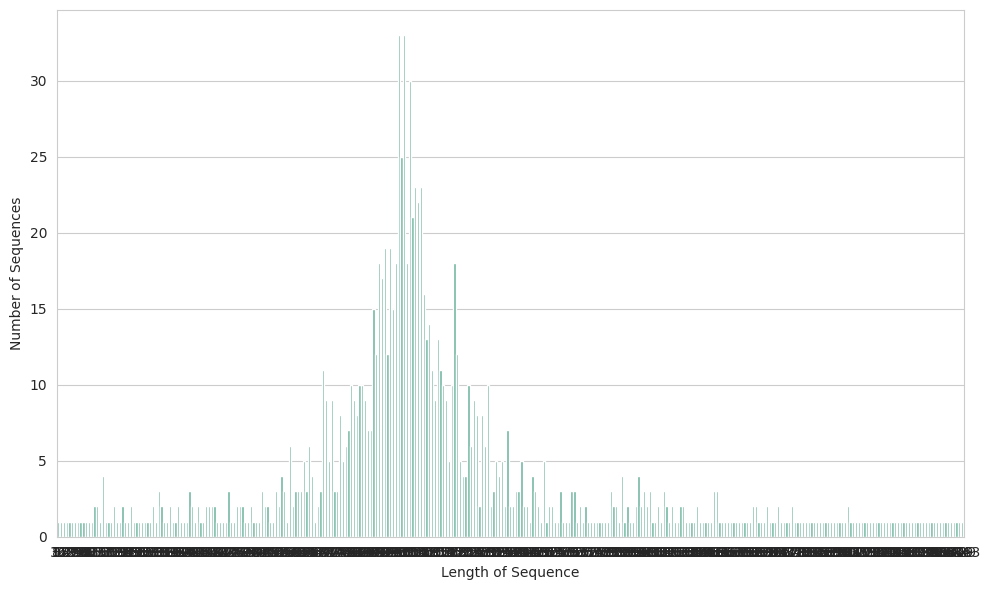

In [62]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Sequence'].apply(len))
plt.xlabel('Length of Sequence')
plt.ylabel('Number of Sequences')
plt.tight_layout()
plt.show()

After computing the similarity matrix from the alignment of sequences dones with blosum substitution matrix :
- do `make blosum` in the terminal

We can now display the similarity matrix


In [82]:
# load the similarity matrix made with Blosum62
similarity_matrix = np.load('../data/processed/similarity_matrix.npy')

In [64]:
# Display the similarity matrix information
print('Similarity matrix shape: {}'.format(similarity_matrix.shape))
print('Minimum similarity: {}'.format(similarity_matrix.min()))
print('Maximum similarity: {}'.format(similarity_matrix.max()))
print('Average similarity: {}'.format(similarity_matrix.mean()))
print('Median similarity: {}'.format(np.median(similarity_matrix)))

Similarity matrix shape: (1155, 1155)
Minimum similarity: 0.0
Maximum similarity: 35739.0
Average similarity: 1117.0207439890557
Median similarity: 1056.0


<Axes: >

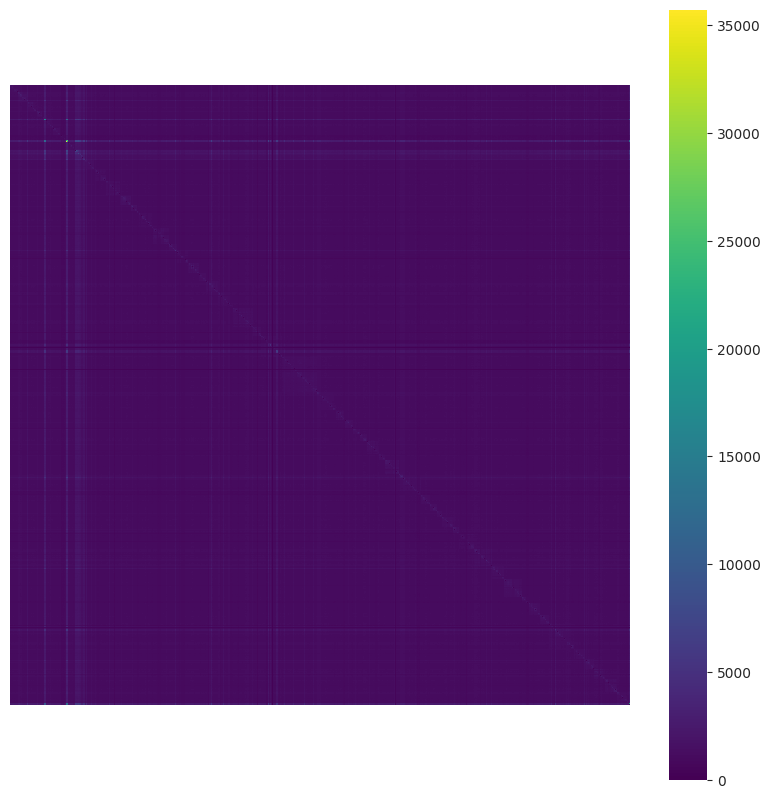

In [83]:
# Heatmap of the similarity matrix
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap='viridis', square=True,xticklabels=False, yticklabels=False)



/tmp/ipykernel_60349/1147474857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_matrix.flatten(), bins=100)


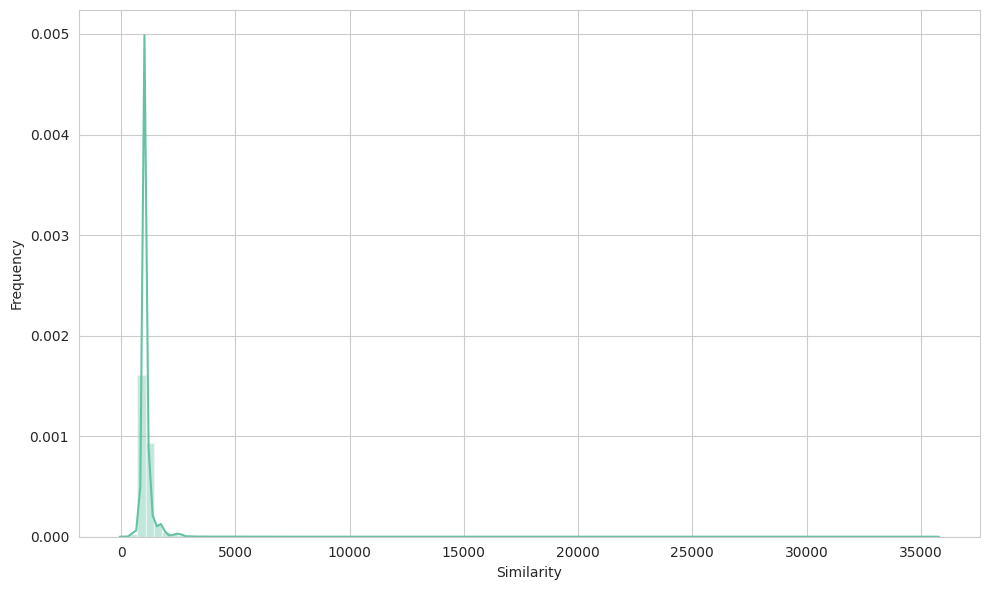

In [84]:
# Display the distribution of the similarity matrix
plt.figure(figsize=(10, 6))
sns.distplot(similarity_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [89]:
# Modify every value > 1000 to 1000
similarity_matrix = np.where(similarity_matrix > 2000,2000, similarity_matrix)
# Modify every value < 300 to 0
similarity_matrix = np.where(similarity_matrix < 300,0, similarity_matrix)


/tmp/ipykernel_60349/1147474857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_matrix.flatten(), bins=100)


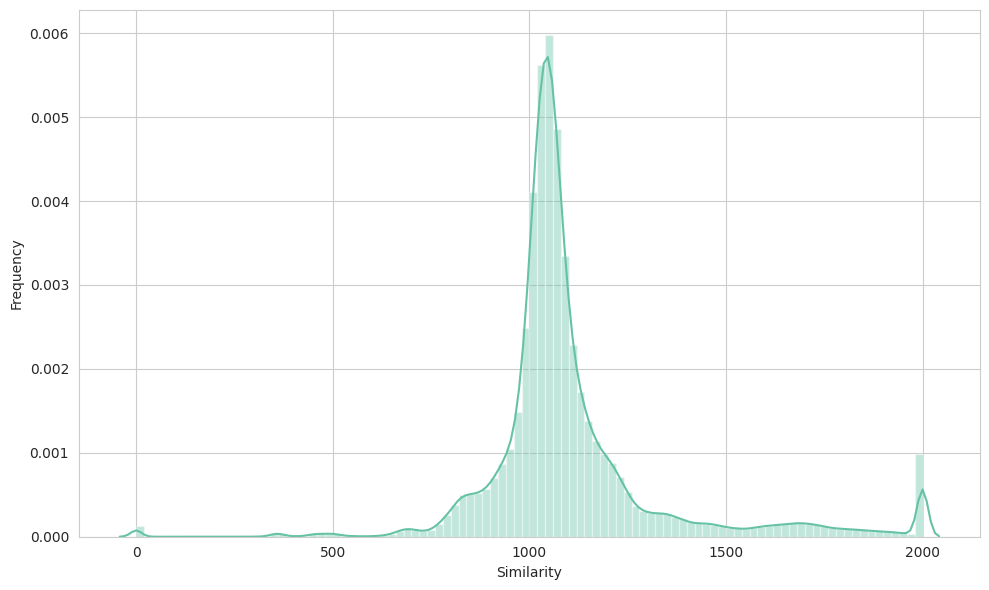

In [90]:
# Display the distribution of the similarity matrix
plt.figure(figsize=(10, 6))
sns.distplot(similarity_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [144]:
med = np.median(similarity_matrix)
std = np.std(similarity_matrix)
threshold = med + std
threshold_2 = med - std
similarity_matrix = np.where(similarity_matrix > threshold,threshold, similarity_matrix)
similarity_matrix = np.where(similarity_matrix < threshold_2,threshold_2, similarity_matrix)

/tmp/ipykernel_60349/1147474857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_matrix.flatten(), bins=100)


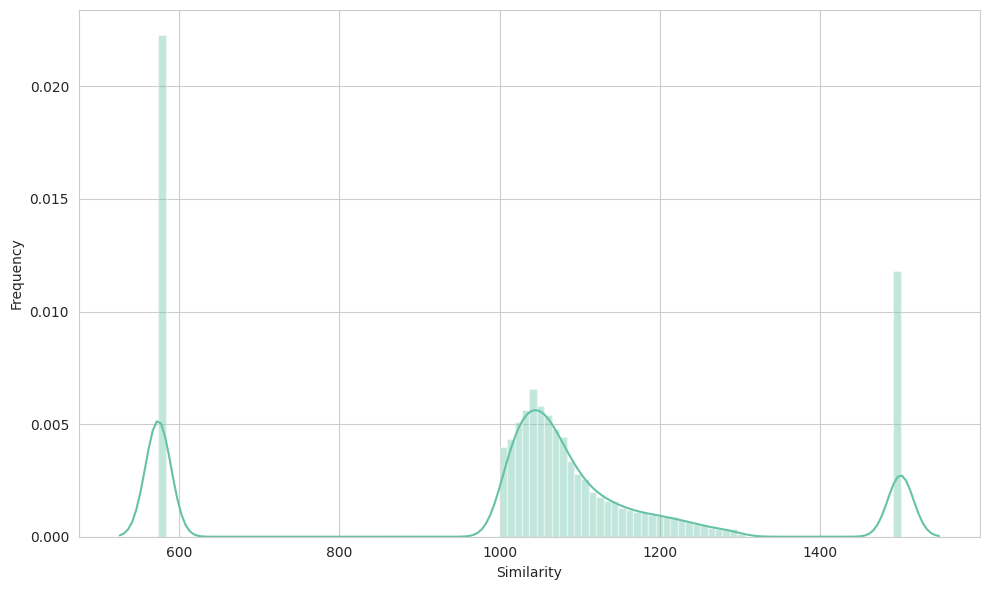

In [145]:
# Display the distribution of the similarity matrix
plt.figure(figsize=(10, 6))
sns.distplot(similarity_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

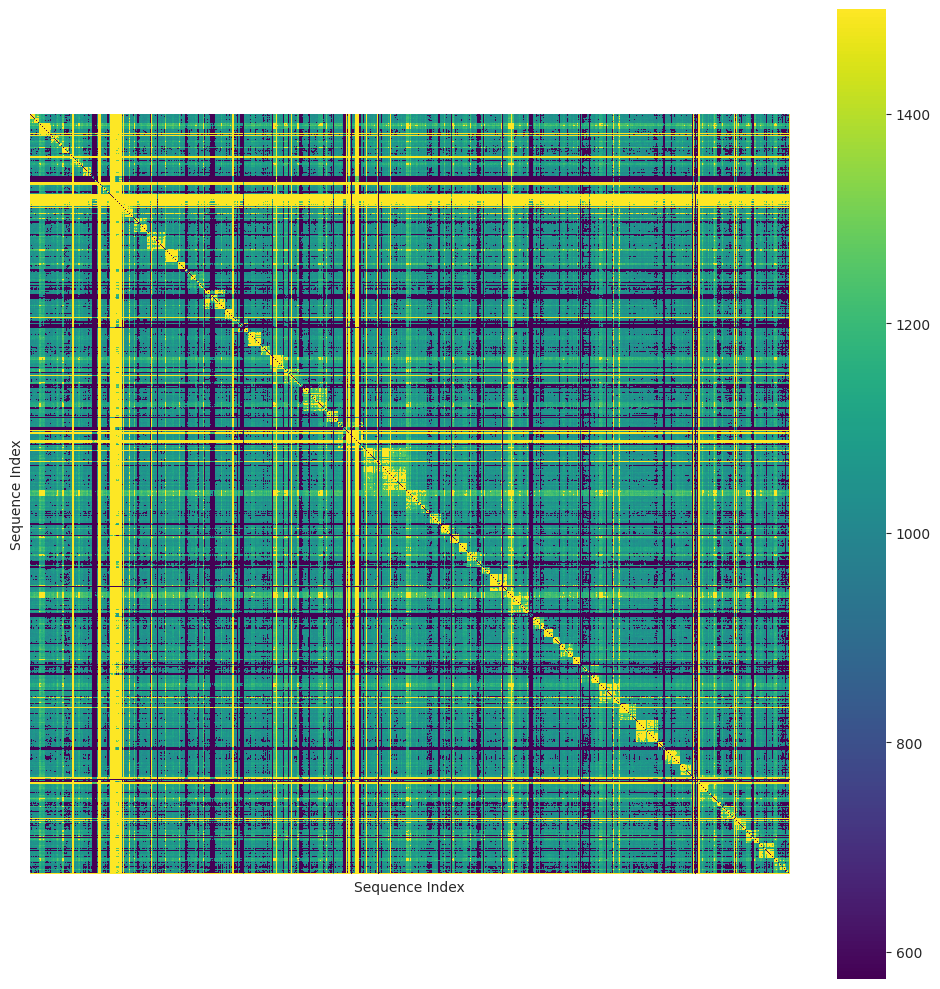

In [166]:
#Display new heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap='viridis',square=True,xticklabels=False, yticklabels=False)
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.tight_layout()
plt.show()

In [147]:
# Display the graph of the similarity matrix with networkx
import networkx as nx
G = nx.from_numpy_array(similarity_matrix)

print(G.number_of_nodes())
print(G.number_of_edges())



1155
667590


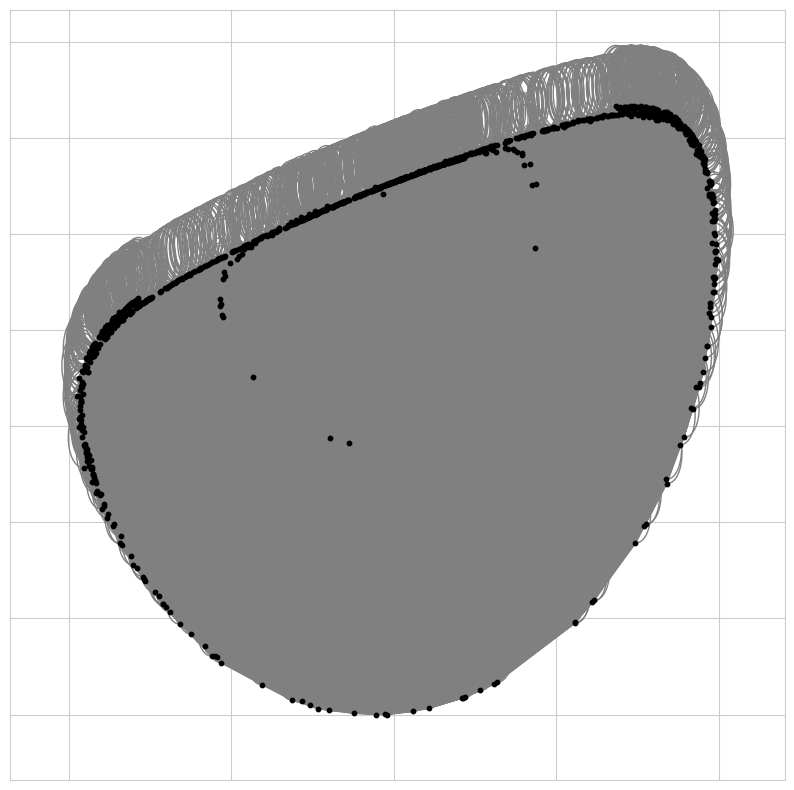

In [149]:
# Display the graph of the similarity matrix with networkx

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_size=10, node_color='black', edge_color='gray', with_labels=False)

In [150]:
# Make the similarity matrix stochastic
stochastic_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)

# Check nan values
print('Number of nan values: {}'.format(np.isnan(stochastic_matrix).sum()))

Number of nan values: 0


In [151]:
# Remplace nan values with a 0
stochastic_matrix = np.nan_to_num(stochastic_matrix)

/tmp/ipykernel_60349/2290892580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stochastic_matrix.flatten(), bins=100)


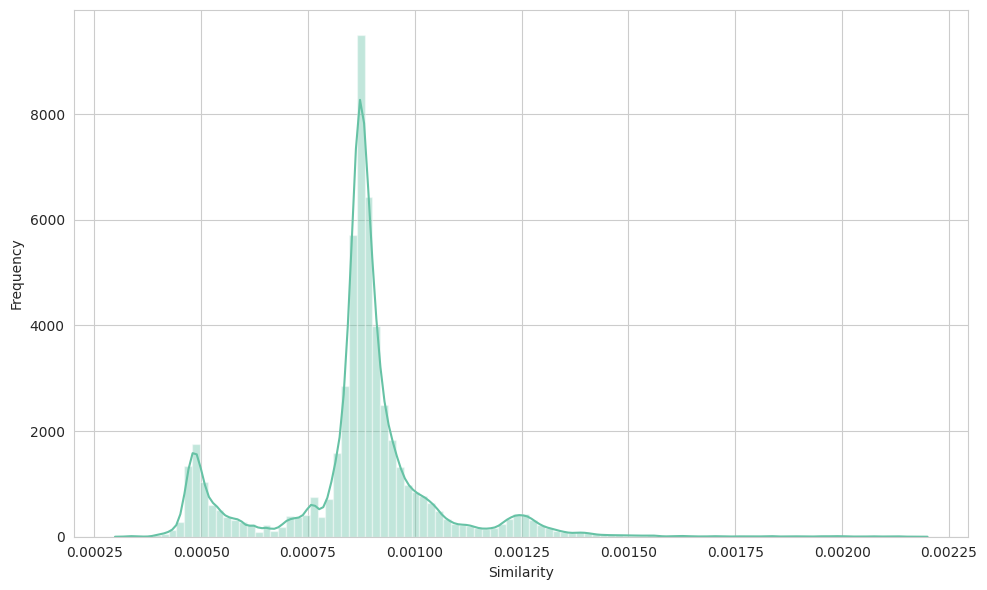

In [152]:
# Distribution of the stochastic matrix
plt.figure(figsize=(10, 6))
sns.distplot(stochastic_matrix.flatten(), bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [153]:
# Make the stochastic matrix symmetric
stochastic_matrix = (stochastic_matrix + stochastic_matrix.T) / 2

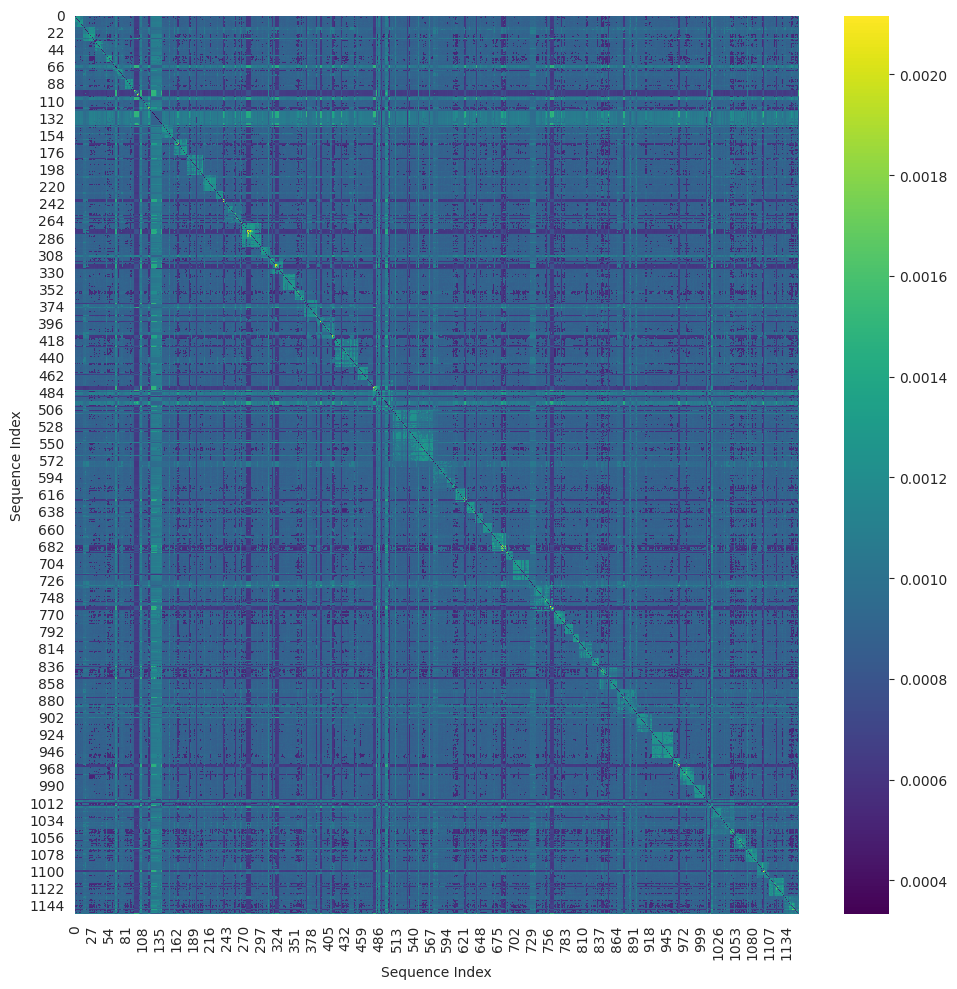

In [154]:
# Display the stochastic matrix
plt.figure(figsize=(10, 10))
sns.heatmap(stochastic_matrix, cmap='viridis')
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.tight_layout()
plt.show()

# Save the new stochastic matrix

In [156]:
np.save('../data/processed/stochastic_matrix.npy', stochastic_matrix)

In [163]:
# Try a mcl clustering
import networkx as nx
import markov_clustering as mc


# Run MCL with default parameters
result = mc.run_mcl(stochastic_matrix, inflation=1.01)         

# Get clusters
clusters = mc.get_clusters(result)

# Get cluster sizes
print('Number of clusters found: {}'.format(len(clusters)))
print('Cluster sizes: {}'.format([len(c) for c in clusters]))

# Evaluate the clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

# Get the labels
true_labels = label

predicted_labels = np.zeros(len(sequences))
for i, cluster in enumerate(clusters):
    for sequence_index in cluster:
        predicted_labels[sequence_index] = i


# Compute the F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print('F1 score: {}'.format(f1))




Number of clusters found: 1036
Cluster sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 62, 62, 62, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 62, 62, 62, 62, 60, 59, 59, 58, 62, 61, 58, 57, 62, 62, 46, 52, 49, 46, 46, 45, 42, 38, 42, 43, 42, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 38, 37, 30, 30, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 6, 2

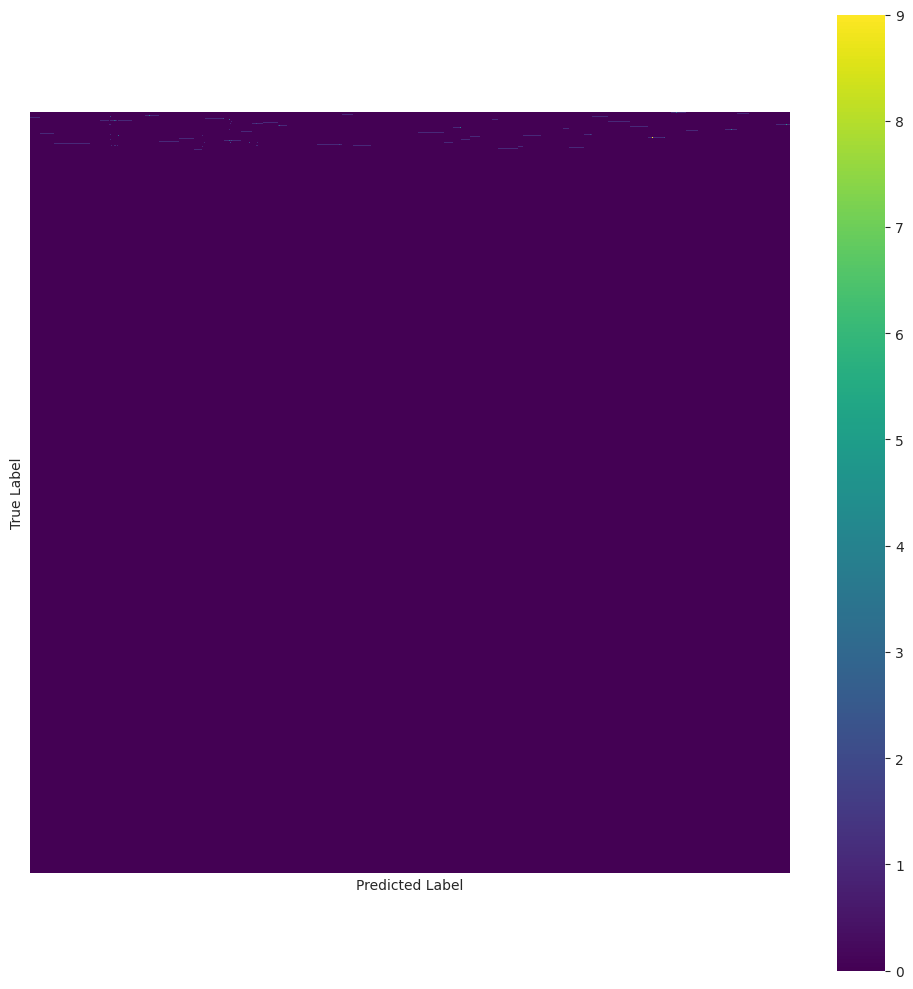

In [162]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap='viridis', square=True, xticklabels=False, yticklabels=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

/tmp/ipykernel_60349/3808885021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([len(c) for c in clusters], bins=100)


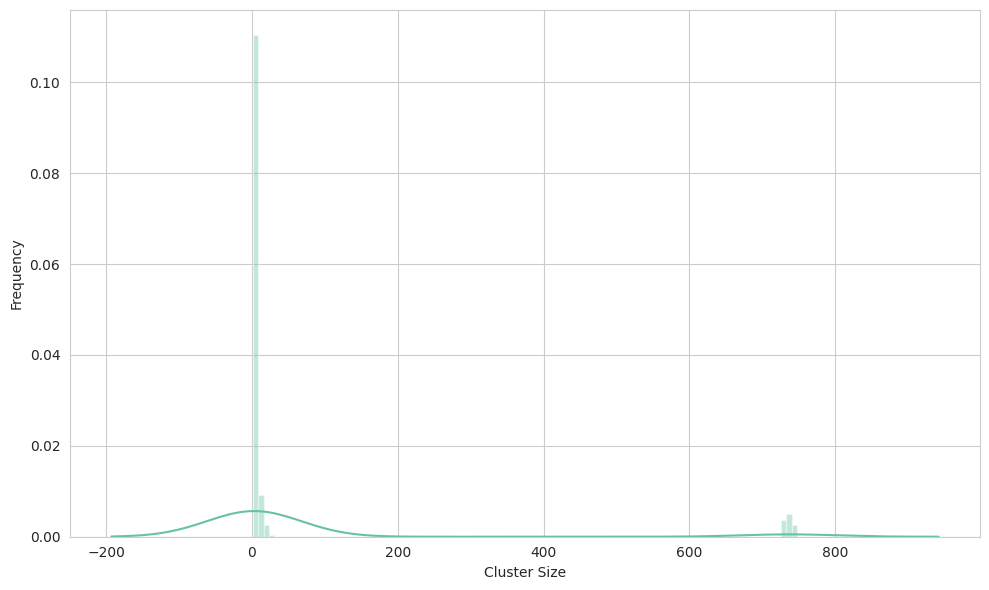

In [134]:
# Display the distribution of the cluster sizes
plt.figure(figsize=(10, 6))
sns.distplot([len(c) for c in clusters], bins=100)
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

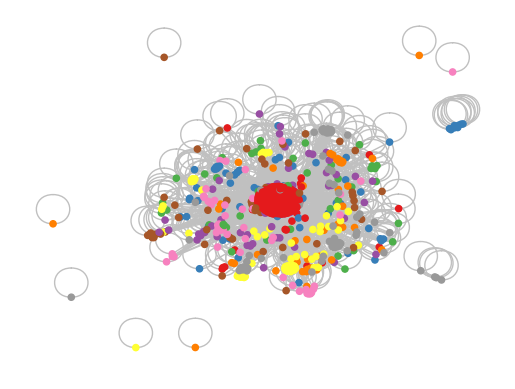

In [135]:
# Display graph with clusters in different colors
mc.draw_graph(result, clusters, node_size=20, with_labels=False, edge_color="silver", cmap=plt.cm.Set1)

In [165]:
## spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Create a spectral clustering model
model = SpectralClustering(n_clusters=50, affinity='precomputed')

# Fit and predict
labels = model.fit_predict(stochastic_matrix)

# Get the silhouette score
print('Silhouette score: {:.3f}'.format(silhouette_score(stochastic_matrix, labels, metric='cosine')))


Silhouette score: -0.090


In [164]:
model = SpectralClustering(n_clusters=50, affinity='rbf')

# Fit and predict
labels = model.fit_predict(similarity_matrix)

# Get the silhouette score
print('Silhouette score: {:.3f}'.format(silhouette_score(similarity_matrix, labels, metric='cosine')))

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score: -0.590
